In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [4]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Accident_ID,0,0.0
Adverse_Weather_Metric,0,0.0
Violations,0,0.0
Max_Elevation,0,0.0
Accident_Type_Code,0,0.0
Cabin_Temperature,0,0.0
Turbulence_In_gforces,0,0.0
Control_Metric,0,0.0
Total_Safety_Complaints,0,0.0
Days_Since_Inspection,0,0.0


In [5]:
train_df.head(1)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570


In [6]:
train_df['Impact'] = pd.factorize(train_df['Severity'])[0] + 1

In [7]:
train_df = train_df.drop(['Severity'],axis=1)
train_df.head(10)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Impact
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,1
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,1
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,2
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,3
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,2
5,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947,1
6,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717,4
7,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008,1
8,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179,4
9,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324,3


C:\Users\1999s\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


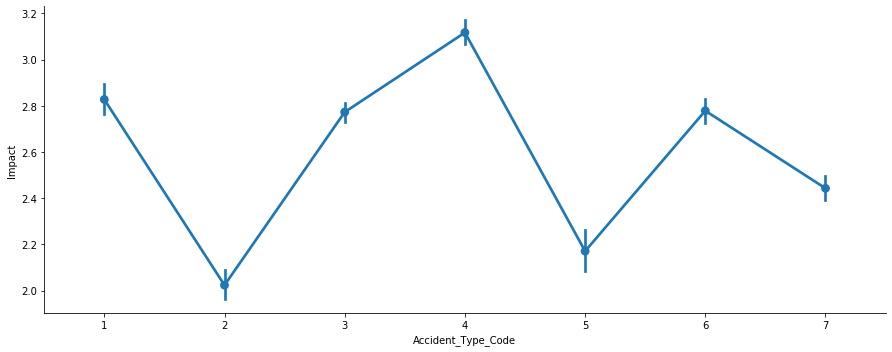

In [8]:
axes = sns.factorplot('Accident_Type_Code','Impact', 
                      data=train_df, aspect = 2.5, )

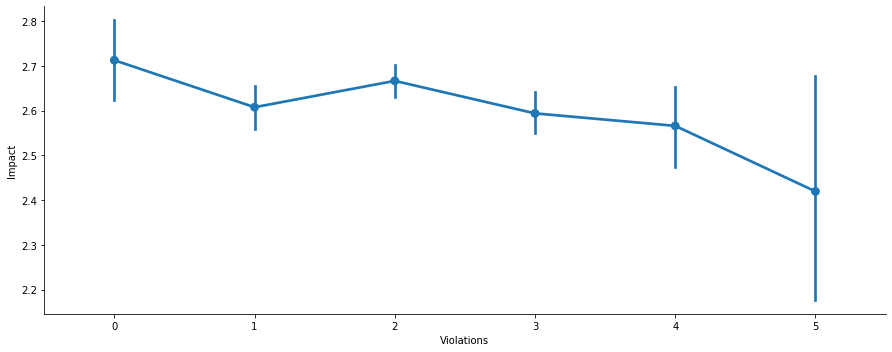

In [9]:
axes = sns.factorplot('Violations','Impact', 
                      data=train_df, aspect = 2.5, )

In [10]:
X_train = train_df.drop("Impact", axis=1)
Y_train = train_df["Impact"]

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.93406593 0.91408591 0.91008991 0.93206793 0.92407592 0.929
 0.936      0.92792793 0.92792793 0.93580742]
Mean: 0.927104889250827
Standard Deviation: 0.008372986954235478


In [11]:
random_forest = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, 
                                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                       min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=10, 
                                       random_state=None, verbose=0, warm_start=False, class_weight=None)
random_forest.fit(X_train, Y_train)


random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [12]:
# random_forest = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, 
#                                      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                      min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, 
#                                      random_state=None, verbose=0, warm_start=False, class_weight=None)
# random_forest.fit(X_train, Y_train)


# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

In [13]:
# random_forest.score(X_train, Y_train)
# print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
train = pd.read_csv("train.csv")
# train['Impact'] = pd.factorize(train['Severity'])[0] + 1
train = train.drop(['Severity'],axis=1)
ans = random_forest.predict(train)
from sklearn.metrics import r2_score
score=r2_score(Y_train,ans)
score

1.0

In [14]:
data = [train_df, test_df]
for dataset in data:
    dataset['control']= dataset['Control_Metric']/ dataset['Turbulence_In_gforces']                                                                         

In [15]:
test_df.head(10)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,control
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,185.498752
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,257.474819
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,192.242374
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,157.341739
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,179.126762
5,44.794521,8,14,52.597995,0.366961,77.08,2,15496.086157,1,0.221040,40,143.334138
6,62.374429,13,13,66.499544,0.375616,88.48,7,23226.236895,3,0.002196,45,177.041497
7,14.520548,17,5,66.180492,0.413841,80.09,4,39076.313532,1,0.071707,50,159.917553
8,0.000000,20,0,67.730173,0.203960,78.37,6,38472.698964,2,0.009371,52,332.075226
9,45.981735,11,4,66.545123,0.252283,82.69,6,25419.801519,2,0.006051,85,263.771261


In [16]:
train_df  = train_df.drop("Violations", axis=1)
test_df  = test_df.drop("Violations", axis=1)
X_train = train_df.drop("Impact", axis=1)
Y_train = train_df["Impact"]
random_forest.fit(X_train, Y_train)
X_test = test_df
Y_prediction = random_forest.predict(X_test)

In [17]:
from sklearn.metrics import f1_score
ans1 = random_forest.predict(X_train)
f1score = f1_score(Y_train, ans1,average='weighted')
f1score

1.0

In [18]:

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
Safety_Score,0.270
Days_Since_Inspection,0.183
Control_Metric,0.119
Adverse_Weather_Metric,0.098
Accident_Type_Code,0.091
control,0.060
Turbulence_In_gforces,0.045
Cabin_Temperature,0.039
Max_Elevation,0.036


In [82]:
prediction=[]
for y in Y_prediction:
    if y==1:
        prediction.append('Minor_Damage_And_Injuries')
    elif y==2:
        prediction.append('Significant_Damage_And_Fatalities')
    elif y==3:
        prediction.append('Significant_Damage_And_Serious_Injuries')
    else:
        prediction.append('Highly_Fatal_And_Damaging')

In [83]:
test_df

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Adverse_Weather_Metric,Accident_ID,control
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,0.069692,1,185.498752
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,0.002777,10,257.474819
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,0.004316,14,192.242374
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,0.199990,17,157.341739
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,0.483696,21,179.126762
...,...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,11,49.680948,0.470819,77.80,2,48251.586622,0.659387,12484,105.520196
2496,54.840183,9,9,71.194166,0.417087,79.77,6,20761.984416,0.005010,12487,170.693839
2497,36.712329,14,10,91.203282,0.313950,83.96,6,36676.100601,0.008629,12488,290.503020
2498,38.721461,13,14,73.154057,0.275003,77.38,6,24211.359510,0.006247,12491,266.012309


In [84]:
sub = pd.read_csv("test.csv")
sub['Severity'] = prediction
col_list = ['Accident_ID','Severity']
sub= sub[col_list]

In [85]:
sub.to_csv('rf3.csv',index=False)